In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
x = torch.ones(1, requires_grad=True)
optim = torch.optim.SGD([x], lr=1e-3)

In [3]:
x = torch.ones(1, requires_grad=True)
optim = torch.optim.SGD([x], lr=1e-3)

X=[]
E=[]
V=[]
TV=[]

iterations=10000
for i in range(iterations):

    optim.zero_grad()
    target_value = x*2
    target_value.backward(retain_graph=True)
    norm_fixed_grad = x.grad / torch.norm(x.grad,2)

    optim.zero_grad()
    value = x*1
    predict_error = torch.square(target_value.detach() - value)
    predict_error.backward()
    x.grad = x.grad - torch.dot(x.grad,norm_fixed_grad)*norm_fixed_grad
    optim.step()
    
    E.append(predict_error.item())
    X.append(x.detach().cpu().clone().numpy())
    V.append(value.item())
    TV.append(target_value.item())

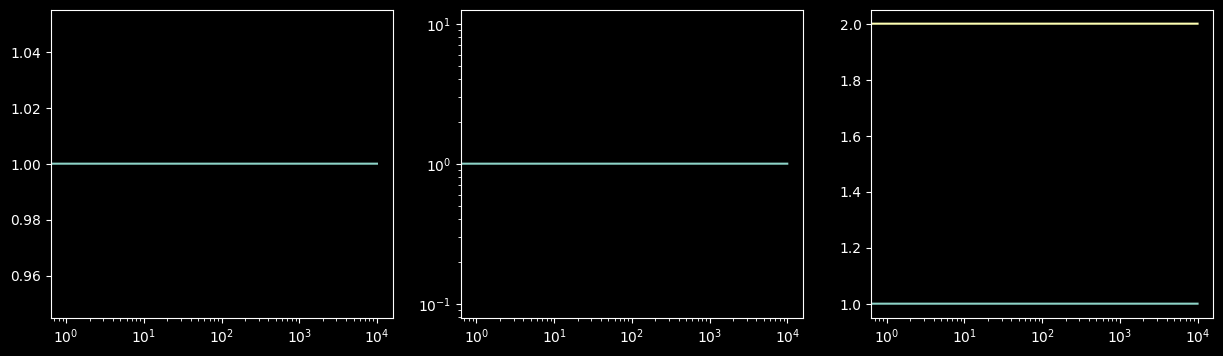

In [4]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.plot(X)
plt.xscale('log')
plt.subplot(1,3,2)
plt.plot(E)
plt.xscale('log')
plt.yscale('log')
plt.subplot(1,3,3)
plt.plot(V)
plt.plot(TV)
plt.xscale('log')


In [5]:
x = torch.ones(2, requires_grad=True)
optim = torch.optim.SGD([x], lr=1e-1)

X=[]
E=[]
V=[]
TV=[]

iterations=100000
for i in range(iterations):

    optim.zero_grad()
    target_value = x[0]*(2+x[1])
    target_value.backward(retain_graph=True)
    norm_fixed_grad = x.grad / torch.norm(x.grad,2)

    optim.zero_grad()
    value = x[0]*(1+x[1])
    predict_error = torch.square(target_value.detach() - value)
    predict_error.backward()
    x.grad = x.grad - torch.dot(x.grad,norm_fixed_grad)*norm_fixed_grad
    optim.step()

    E.append(predict_error.item())
    X.append(x.detach().cpu().clone().numpy())
    V.append(value.item())
    TV.append(target_value.item())

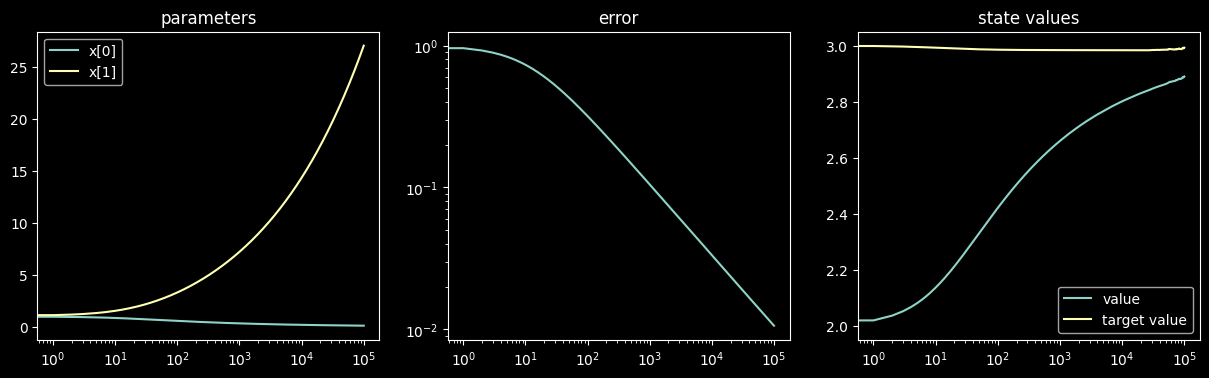

In [6]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.title('parameters')
plt.plot(X)
plt.legend(['x[0]','x[1]'])
plt.xscale('log')
plt.subplot(1,3,2)
plt.title('error')
plt.plot(E)
plt.xscale('log')
plt.yscale('log')
plt.subplot(1,3,3)
plt.title('state values')
plt.plot(V, label='value')
plt.plot(TV, label='target value')
plt.legend()
plt.xscale('log')

In [7]:
x = torch.rand(8, requires_grad=True)
optim = torch.optim.SGD([x], lr=1e-1)

In [8]:
def value_function(state, x):
    if state==0:
        return 2*x[0]+x[7]
    elif state == 1:
        return 2*x[1]+x[7]
    elif state == 2:
        return 2*x[2]+x[7]
    elif state == 3:
        return 2*x[3]+x[7]
    elif state == 4:
        return 2*x[4]+x[7]
    elif state == 5:
        return 2*x[5]+x[7]
    elif state == 6:
        return x[6]+2*x[7]
    else:
        assert 0

In [9]:
X=[]
E=[]
V=[]
TV=[]

gamma = 0.99

iterations=100000
for i in range(iterations):

    state = np.random.randint(0,7,1)
    next_state = np.random.randint(0,7,1)

    optim.zero_grad()
    target_value = value_function(next_state, x)
    target_value.backward(retain_graph=True)
    norm_fixed_grad = x.grad / torch.norm(x.grad,2)

    optim.zero_grad()
    value = value_function(state, x)
    predict_error = torch.square(gamma*target_value.detach() - value)
    predict_error.backward()
    x.grad = x.grad - torch.dot(x.grad,norm_fixed_grad)*norm_fixed_grad

    if next_state==6:
        optim.step()

    E.append(predict_error.item())
    X.append(x.detach().cpu().clone().numpy())
    V.append(value.item())
    TV.append(target_value.item())



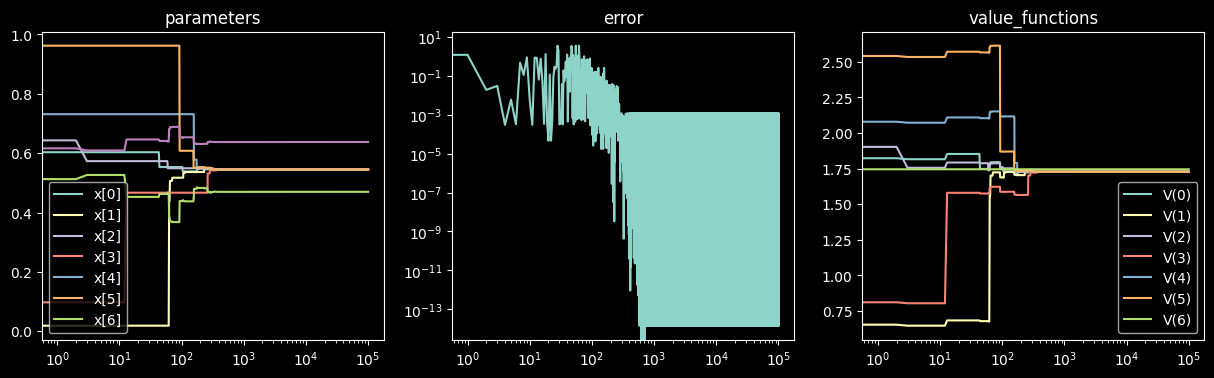

In [10]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.title('parameters')
plt.plot(X)
plt.legend([f"x[{i}]" for i in range(7)])
plt.xscale('log')
plt.subplot(1,3,2)
plt.title('error')
plt.plot(E)
plt.xscale('log')
plt.yscale('log')
plt.subplot(1,3,3)
plt.title('value_functions')
X = np.array(X)
for i in range(7):
    plt.plot(value_function(i, X.T))
plt.legend([f"V({i})" for i in range(7)])
plt.xscale('log')


In [11]:
x = torch.rand(8, requires_grad=True)
optim = torch.optim.SGD([x], lr=1e-1)

In [12]:
X=[]
E=[]
V=[]
TV=[]

gamma = 0.99

iterations=100000
for i in range(iterations):

    state = np.random.randint(0,7,1)
    next_state = np.random.randint(0,7,1)

    optim.zero_grad()
    target_value = value_function(next_state, x)
    target_value.backward(retain_graph=True)
    norm_fixed_grad = x.grad / torch.norm(x.grad,2)

    optim.zero_grad()
    value = value_function(state, x)
    predict_error = torch.square(gamma*target_value.detach() - value)
    predict_error.backward()
    if state!=next_state:
        x.grad = x.grad - torch.dot(x.grad,norm_fixed_grad)*norm_fixed_grad

    if next_state==6:
        optim.step()

    E.append(predict_error.item())
    X.append(x.detach().cpu().clone().numpy())
    V.append(value.item())
    TV.append(target_value.item())

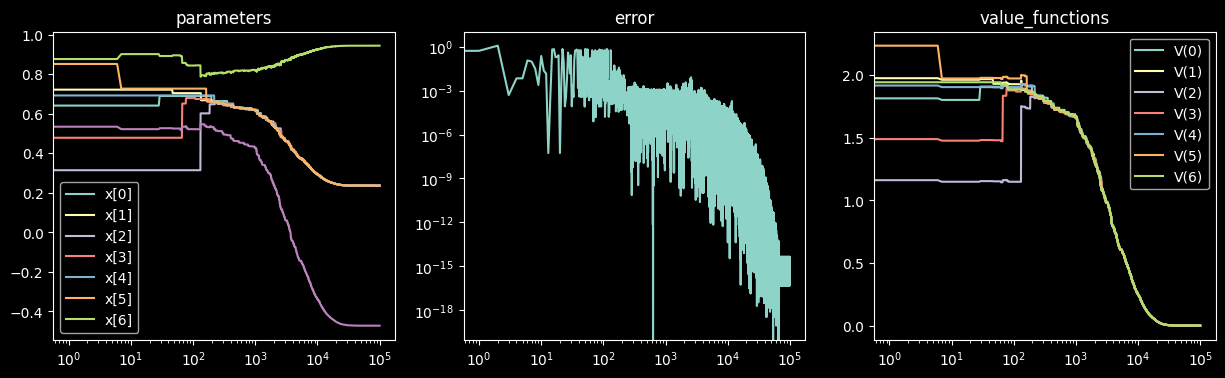

In [13]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.title('parameters')
plt.plot(X)
plt.legend([f"x[{i}]" for i in range(7)])
plt.xscale('log')
plt.subplot(1,3,2)
plt.title('error')
plt.plot(E)
plt.xscale('log')
plt.yscale('log')
plt.subplot(1,3,3)
plt.title('value_functions')
X = np.array(X)
for i in range(7):
    plt.plot(value_function(i, X.T))
plt.legend([f"V({i})" for i in range(7)])
plt.xscale('log')


In [100]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [101]:
def value_function(state, x):
    if state==0:
        return x[0] + 100*x[1]
    elif state == 1:
        return x[1] + 100*x[2]
    elif state == 2:
        return x[2] + 100*x[0]
    else:
        assert 0

In [102]:
x = torch.rand(3)
x[0]=1
x[1]=0
x[2]=1
x.requires_grad_()
optim = torch.optim.SGD([x], lr=1e-5)

In [103]:
X=[]
E=[]
V=[]
TV=[]

iterations=10000
for i in range(iterations):

    state = (i+2)%3
    next_state =  (i+3)%3

    optim.zero_grad()
    target_value = value_function(next_state, x)
    target_value.backward(retain_graph=True)
    norm_fixed_grad = x.grad / torch.norm(x.grad,2)

    optim.zero_grad()
    value = value_function(state, x)
    predict_error = torch.square(target_value.detach() - value)
    predict_error.backward()
    if state!=next_state:
        x.grad = x.grad - torch.dot(x.grad,norm_fixed_grad)*norm_fixed_grad

    optim.step()

    E.append(predict_error.item())
    X.append(x.detach().cpu().clone().numpy())
    V.append(value.item())
    TV.append(target_value.item())

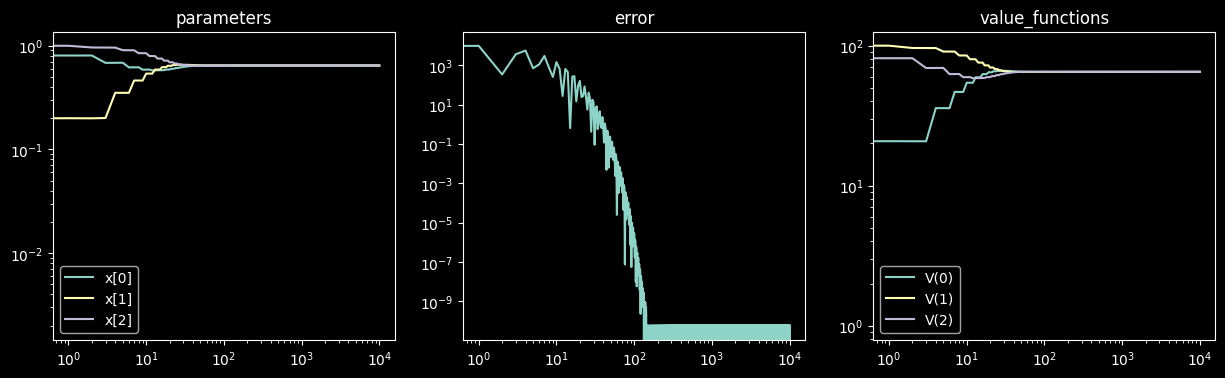

In [104]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.title('parameters')
plt.plot(X)
plt.legend([f"x[{i}]" for i in range(3)])
plt.xscale('log')
plt.yscale('log')
plt.subplot(1,3,2)
plt.title('error')
plt.plot(E)
plt.xscale('log')
plt.yscale('log')
plt.subplot(1,3,3)
plt.title('value_functions')
X = np.array(X)
for i in range(3):
    plt.plot(value_function(i, X.T))
plt.legend([f"V({i})" for i in range(3)])
plt.xscale('log')
plt.yscale('log')